In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define number of data points
num_points = 20

# Define time stamps
time_stamps = np.linspace(0, 1, num_points) 

# Define functions for generating sine waves
def low_freq_low_amp(t):
  return np.sin(2*np.pi*t * 0.5) * 0.2

def high_freq_low_amp(t):
  return np.sin(2*np.pi*t * 5) * 0.1

def low_freq_high_amp(t):
  return np.sin(2*np.pi*t) * 2  # Increased frequency for more cycles

def high_freq_high_amp(t):
  return np.sin(2*np.pi*t * 5) * 1

# Define functions for increasing amplitude with similar shape
def increasing_amp_smooth(t):
  return np.sin(2*np.pi*t * 5) * (t**2 + 0.2)  # Smooth increase

def increasing_amp_linear(t):
  return np.sin(2*np.pi*t * 5) * (t * 0.1 + 1)  # Linear increase

# Generate time series data
series1 = low_freq_low_amp(time_stamps)
series2 = high_freq_low_amp(time_stamps)
series3 = low_freq_high_amp(time_stamps)
series4 = high_freq_high_amp(time_stamps)
series5 = increasing_amp_smooth(time_stamps)
series6 = increasing_amp_linear(time_stamps)

# Generate a more curved parabolic curve
parabola = -4 * (time_stamps - 0.5) ** 2 + 1  # Increased coefficient for stronger curvature

data = np.vstack([series1, series2, series3, series4, series5, series6, parabola]).T




In [33]:
print(data.shape)

(20, 7)


In [34]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
labels = kmeans.labels_



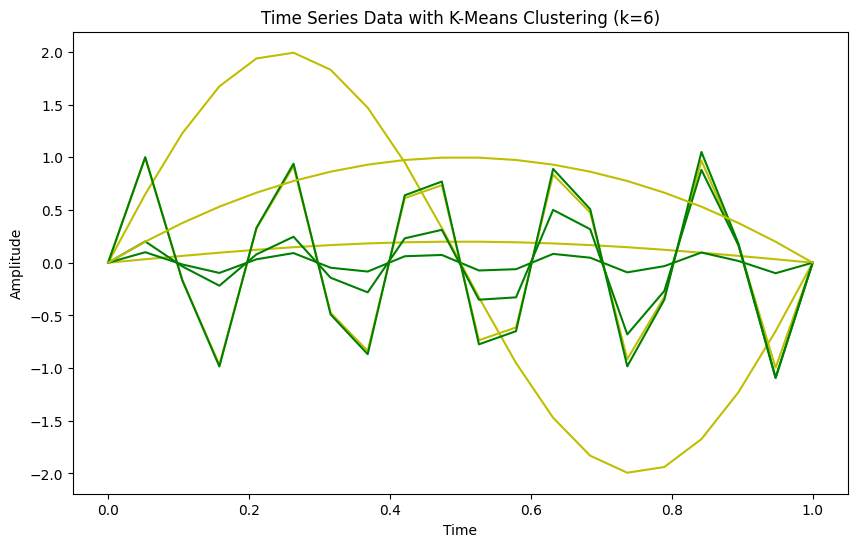

In [36]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b','y']
for i in range(data.shape[1]):
    plt.plot(time_stamps, data[:, i], '-', c=colors[labels[i]], label=f'Cluster {labels[i]}')

plt.title('Time Series Data with K-Means Clustering (k=6)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
# Plot all data on one graph
# plt.figure(figsize=(10, 6))
# plt.plot(time_stamps, series1, label="Low Freq, Low Amp")
# plt.plot(time_stamps, series2, label="High Freq, Low Amp")
# plt.plot(time_stamps, series3, label="Low Freq, High Amp")
# plt.plot(time_stamps, series4, label="High Freq, High Amp")
# plt.plot(time_stamps, series5, label="Increasing Amp (Smooth)")
# plt.plot(time_stamps, series6, label="Increasing Amp (Linear)")
# plt.plot(time_stamps, parabola, label="Parabolic Curve (Stronger)")

# # Add labels and title
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.title("Sample Time Series Data")
# plt.legend()

# # Show the plot with adjusted y-axis limits for better visualization
# plt.ylim(-2.5, 3.5)  # Adjust y-axis for all data
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# This code creates the following time series data with the properties:
#  - Time stamps for each series = 20
#  - General nature: variation of sine wave
#  - Series 1: low frequency, low amplitude
#  - Series 2: High frequency, low amplitude
#  - Series 3: Low frequency, high amplitude (with more than one cycle)
#  - Series 4: High frequency, High amplitude
#  - Series 5: high frequency, Amplitude increasing as a smooth step function
#  - Series 6: High frequency, Amplitude increasing as a linear step function
#  - An additional curve that increases and then decreases like a parabolic curve (more curved)